# パッケージの読み込み

In [1]:
import os
# 数値処理
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# グラフ描画
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

# EDA
## データの読み込み

In [2]:
# データの配置場所
input_dir = 'C:/Users/rhira/Documents/GitHub'\
            '/signate-competition-Liver-disease-beginner/data/input'
# トレーニングデータ
train = pd.read_csv(os.path.join(input_dir[:], 'train.csv'))
# テストデータ
test = pd.read_csv(os.path.join(input_dir[:], 'test.csv'))

## トレーニングデータの探索

### display

データカラム

- Age     :年齢
- Gender  :性別
- T_Bil   :総ビリルビン
- D_Bil   :直接ビリルビン
- ALP     :アルカリフォスターゼ
- ALT_GPT :アラニンアミノトランスフェラーゼ
- AST_GOT :アスパラギン酸アミノトランスフェラーゼ
- TP      :総タンパク
- Alb     :アルブミン
- AG_ratio:アルブミン/グロブリン比
- disease :肝疾患の有無(0:無，1:有)

データサイズ
- 850x11

In [3]:
display(train)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...,...
845,25,Male,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,0
846,57,Male,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,0
847,50,Male,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,32,Female,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


### 欠損値の有無
- 欠損値無

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       850 non-null    int64  
 1   Gender    850 non-null    object 
 2   T_Bil     850 non-null    float64
 3   D_Bil     850 non-null    float64
 4   ALP       850 non-null    float64
 5   ALT_GPT   850 non-null    float64
 6   AST_GOT   850 non-null    float64
 7   TP        850 non-null    float64
 8   Alb       850 non-null    float64
 9   AG_ratio  850 non-null    float64
 10  disease   850 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 73.2+ KB


### カテゴリデータをダミー変数化

In [6]:
train = pd.get_dummies(train, drop_first=True)

### 可視化
#### ヒストグラム
- オレンジ:肝疾患有

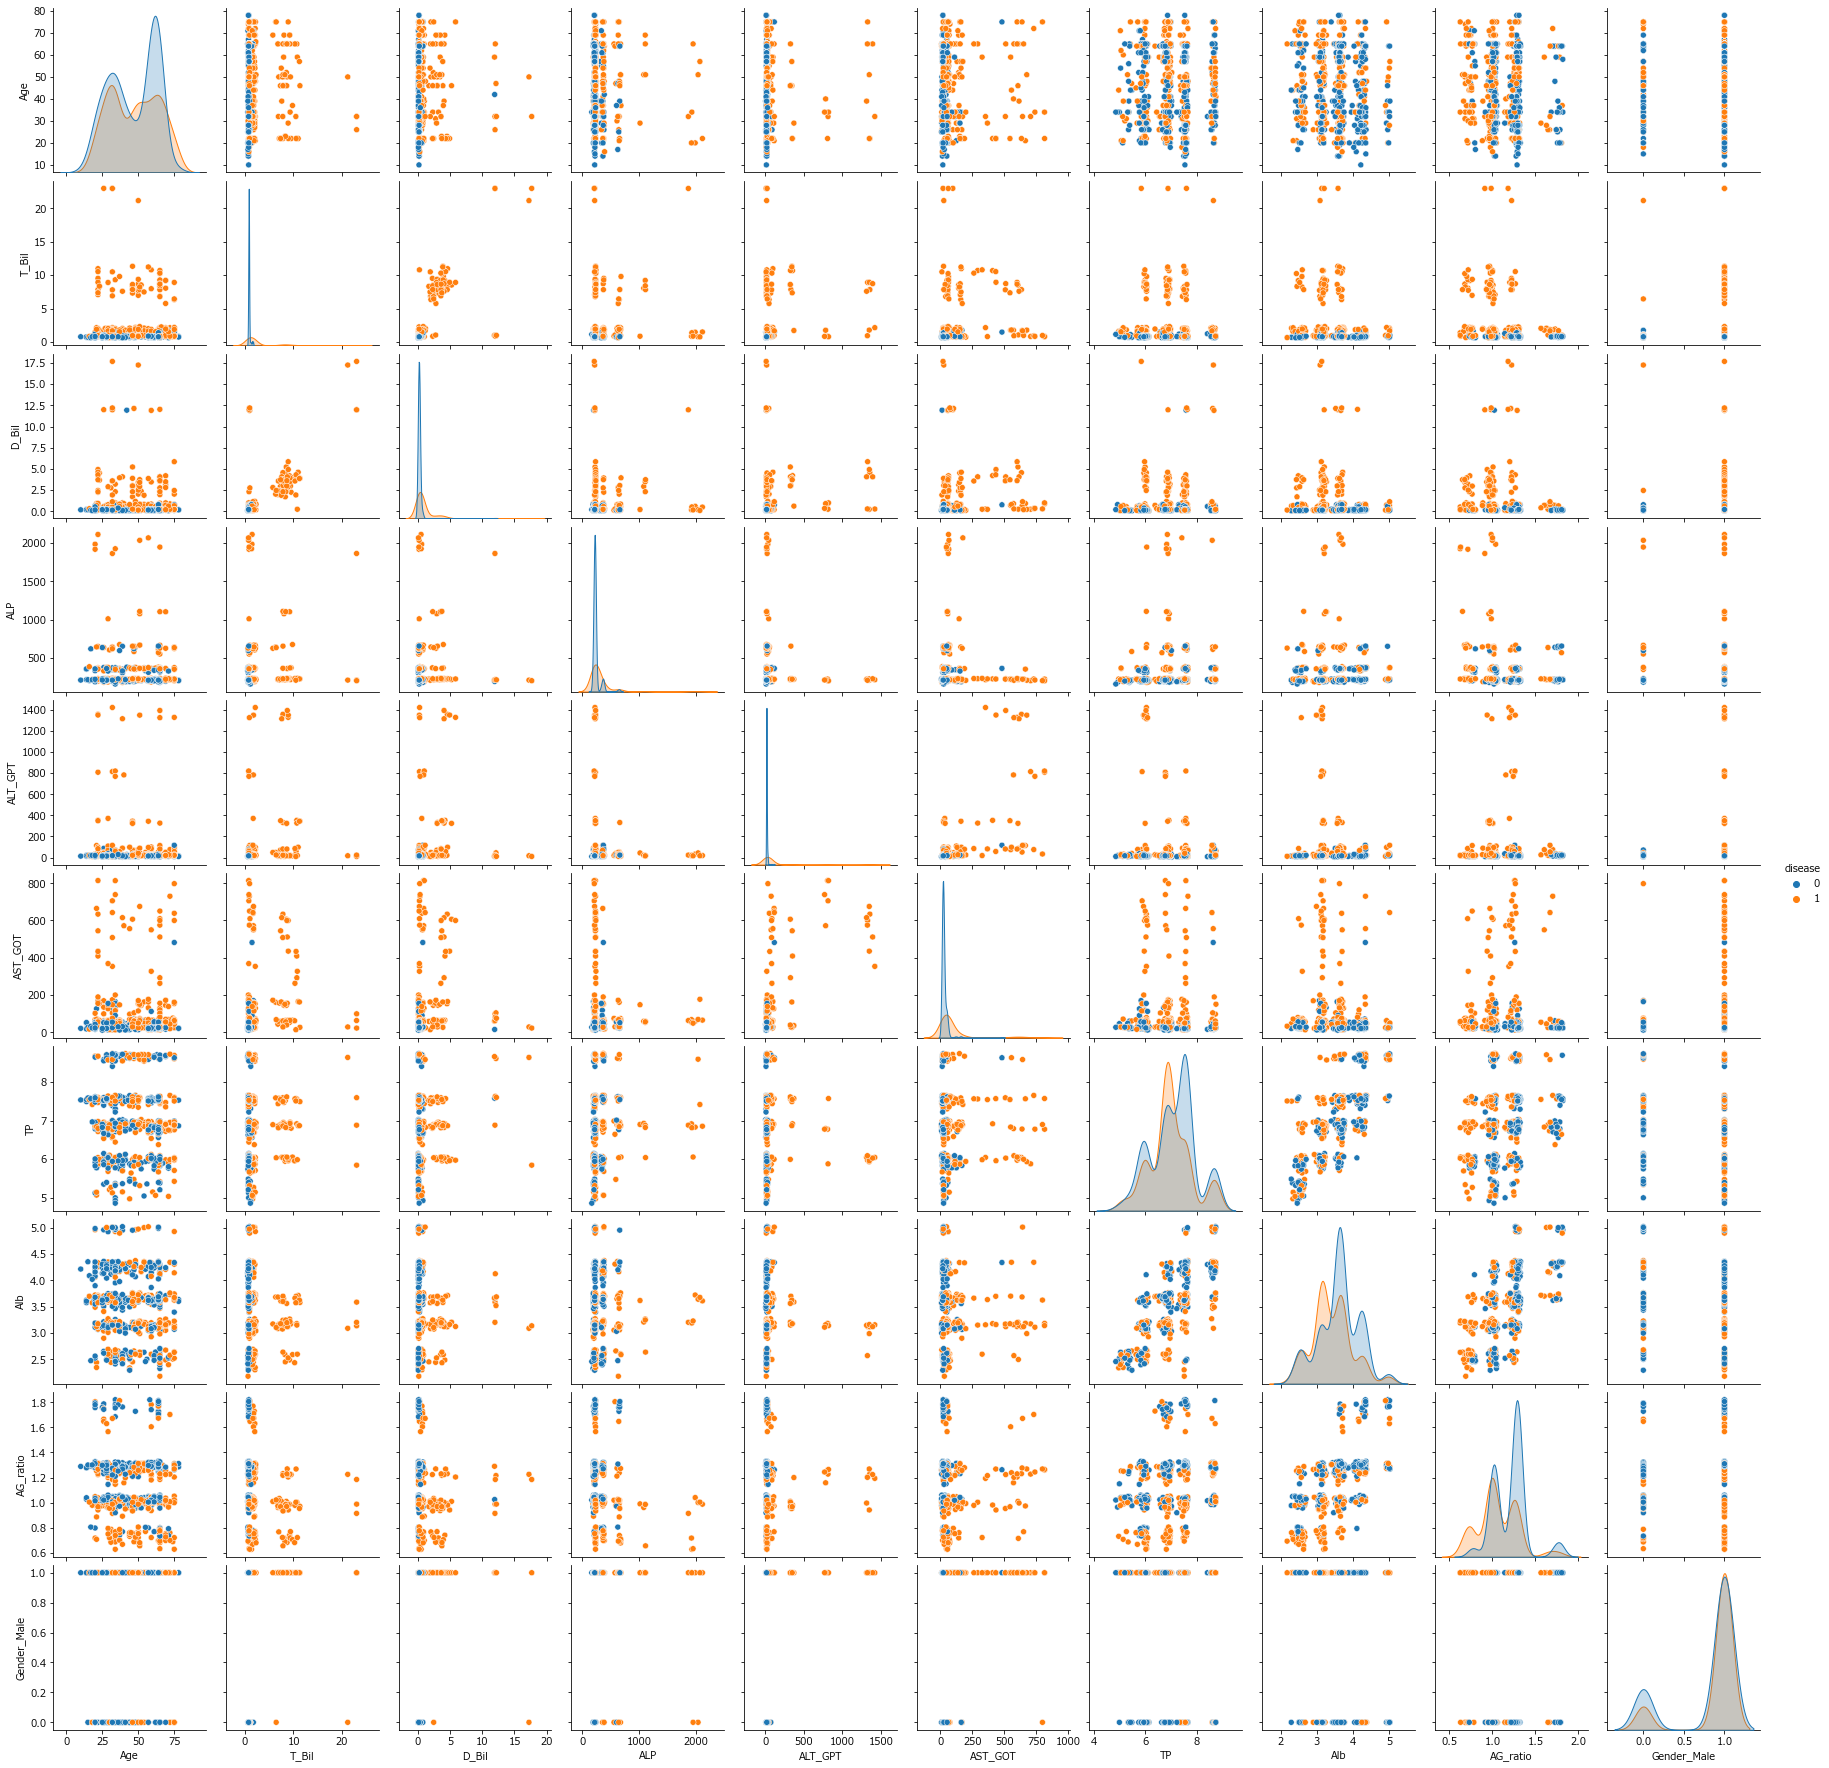

In [7]:
sns.pairplot(data=train, hue='disease');

#### 相関行列
- 過剰な相関はないためすべての変数を解析には使用する

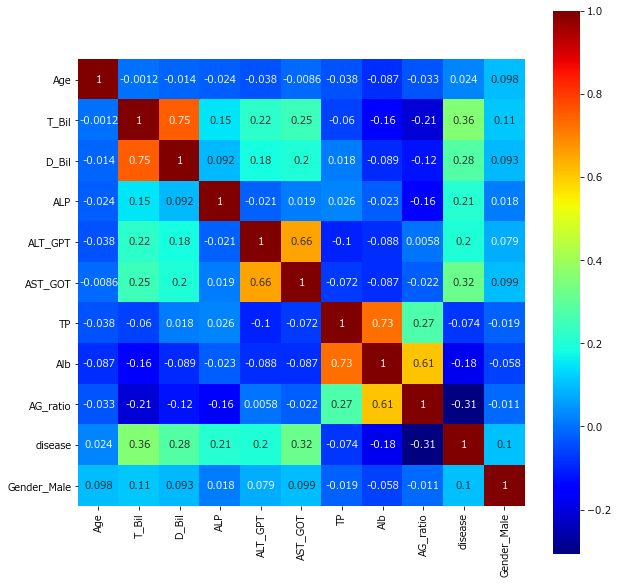

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), cmap='jet', square=True, annot=True);

In [12]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 